# Glider Toolbox Demo Notebook

### Using a Pre-existing config file for a complete pipeline run

Note: Currently these imports are local references. In the future the toolbox will be an installable package through pip.

In [1]:
# add toolbox to src (THIS WILL NOT BE REQUIRED ONCE DEPLOYED)
import sys
from pathlib import Path
src_path = Path("../../src").resolve()

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

### Pipeline Overview

In [ ]:
from toolbox.pipeline import Pipeline
pipeline = Pipeline(   
    "../configs/example_config_doombar.yaml")
pipeline.run()

#### Building the pipeline one step at a time

In [ ]:
pipeline2 = Pipeline()

# add load step
pipeline2.add_step(
    "Load OG1",
    parameters={
        "file_path": "../../examples/data/OG1/Churchill_647_R.nc",  # Path to the input NetCDF file
        "add_meta": False, # Add metadata to the data
        "add_depth": True, # Add depth information to the data
        "add_elapsed_time": False,
        "lat_label": "DEPLOYMENT_LATITUDE"},
    diagnostics=False,
    run_immediately=True )# can run immediately upon creation

# add export step
pipeline2.add_step(
    "Data Export",
    parameters={
        "export_format": "netcdf",  # Define the export format (e.g., OG1, CSV, etc.)
        "output_path": "../../examples/data/OG1/exported_Churchill_647_R.nc"},
    diagnostics=False,
    run_immediately=False )# or run at a future time
# run last step
pipeline2.run_last_step()

In [ ]:
conf = pipeline2.export_config("../../examples/data/OG1/Churchill_647_R_CONFIG.yaml")  # Export the pipeline configuration to a YAML file
conf

# Running Multiple Pipelines

```python

[Discovery] Scanning for step modules in /home/adamwa/Ocean Informatics/Projects/toolbox/src/toolbox/steps/custom
[Discovery] Importing step module: toolbox.steps.custom.derive_ctd
[Discovery] Importing step module: toolbox.steps.custom.export
[Discovery] Importing step module: toolbox.steps.custom.load_data
[Discovery] Importing step module: toolbox.steps.custom.argo_qc
[Discovery] Importing step module: toolbox.steps.custom.calibration
[Discovery] Importing step module: toolbox.steps.custom.find_profiles
[Discovery] Importing step module: toolbox.steps.custom.gen_data
[Discovery] Importing step module: toolbox.steps.custom.variables.salinity
[Discovery] Registered step: Derive CTD
[Discovery] Registered step: Data Export
[Discovery] Registered step: Load OG1
[Discovery] Registered step: Find Profiles
[Discovery] Registered step: QC: Salinity
[Discovery] Registered step: ADJ: Salinity
Step 'Load OG1' added successfully!
Step 'Derive CTD' added successfully!
Step 'Find Profiles' added 

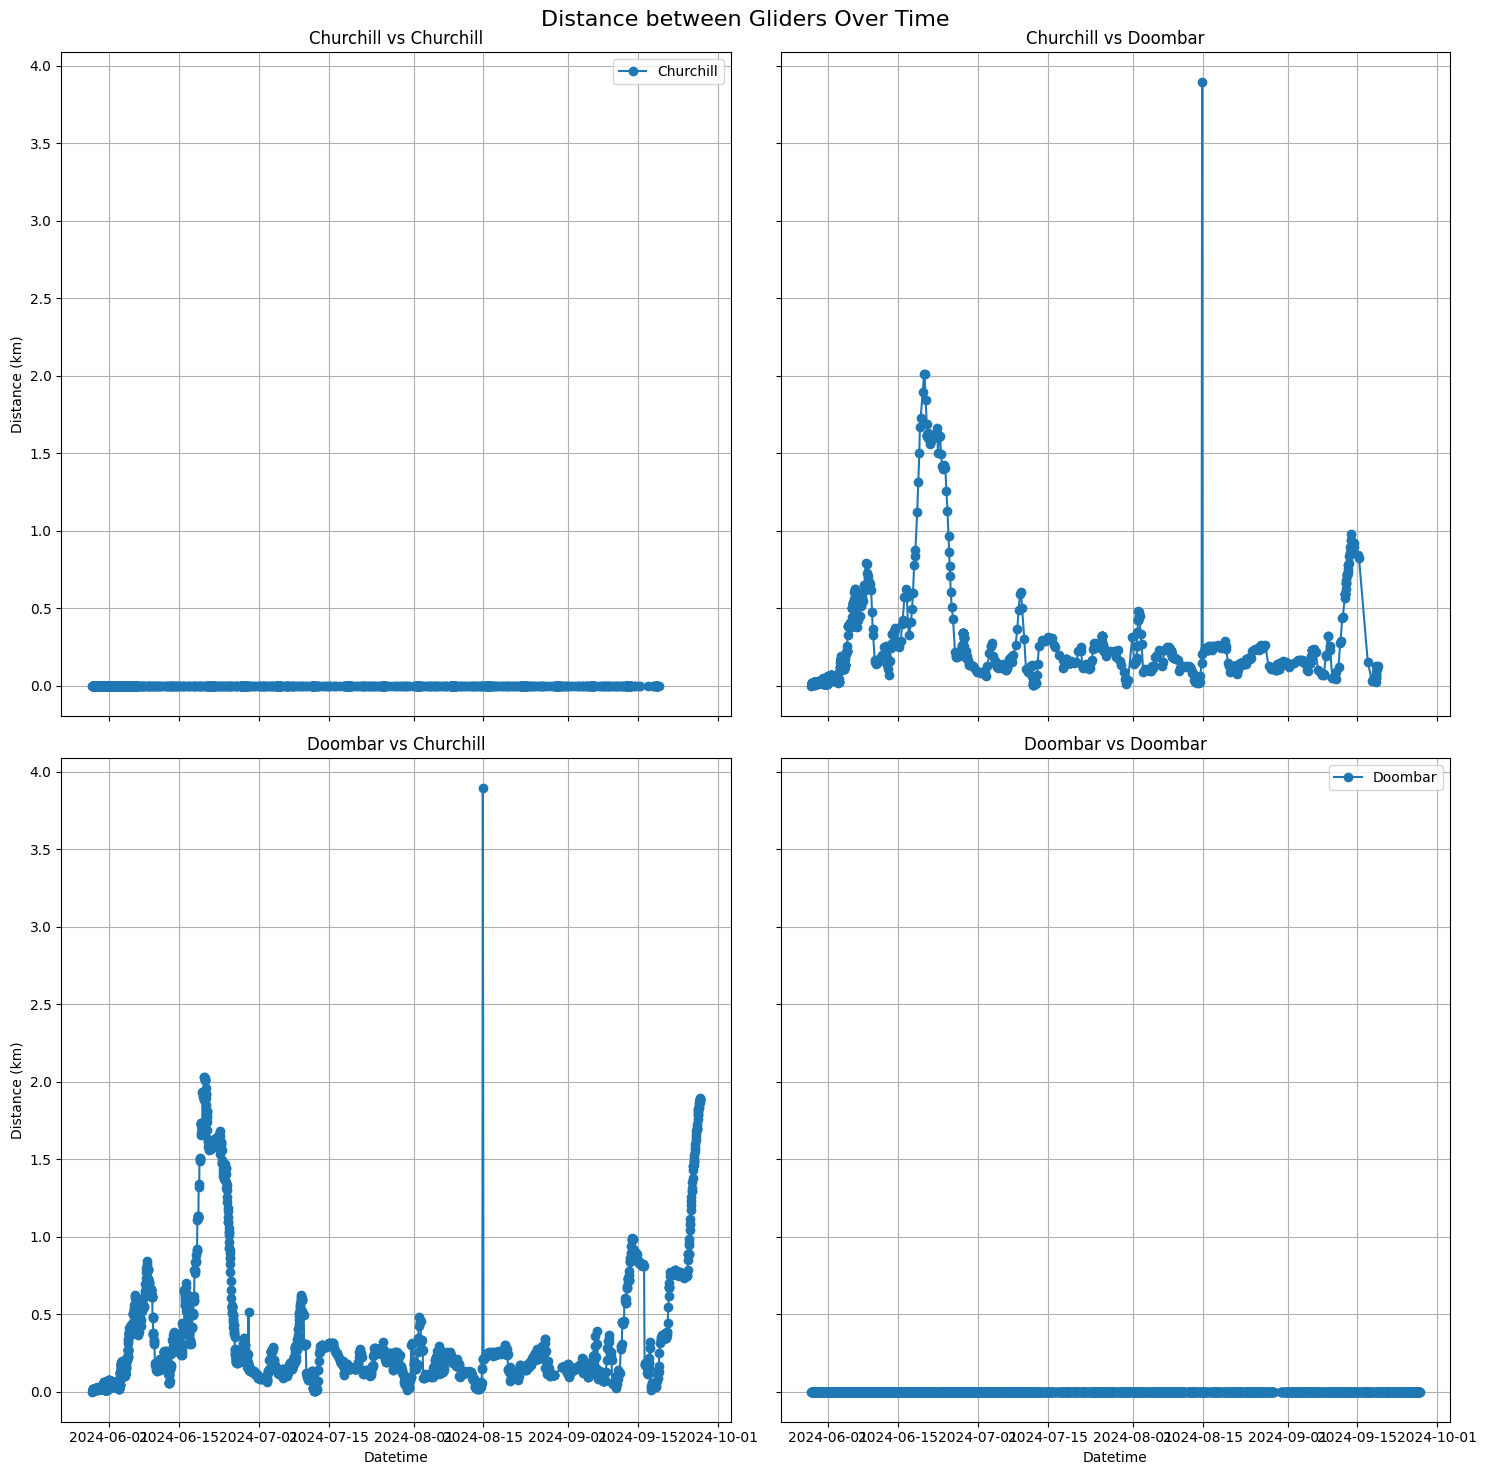

,profile_id,median_TIME,median_LATITUDE,median_LONGITUDE,glider_name,closest_glider_b_profile,glider_b_time_diff,glider_b_distance_km
0,0.0,2024-05-28 12:41:23.526397952,0.600004,-0.240007,Churchill,0.0,0 days,0.0
1,1.0,2024-05-28 17:54:21.412826368,0.599476,-0.239691,Churchill,1.0,0 days,0.0
2,2.0,2024-05-28 17:54:38.662322944,0.599476,-0.239691,Churchill,2.0,0 days,0.0
3,3.0,2024-05-28 18:03:03.403076352,0.599588,-0.239724,Churchill,3.0,0 days,0.0
4,4.0,2024-05-28 18:03:42.218933504,0.599588,-0.239723,Churchill,4.0,0 days,0.0
...,...,...,...,...,...,...,...,...
7137,2476.0,2024-09-27 09:08:28.745773056,0.618796,-0.201130,Doombar,2476.0,0 days,0.0
7138,2477.0,2024-09-27 10:08:04.484528128,0.618765,-0.201154,Doombar,2477.0,0 days,0.0
7139,2478.0,2024-09-27 10:08:24.665679872,0.618765,-0.201148,Doombar,2478.0,0 days,0.0
7140,2479.0,2024-09-27 10:08:46.627350272,0.618765,-0.201142,Doombar,2479.0,0 days,0.0


In [2]:
### Running multiple pipelines using the PipelineManager class
from toolbox.pipeline import PipelineManager
mngr = PipelineManager()
mngr.load_mission_control("../configs/MissionControl.yaml")  # Load the mission control configuration
# This is currently set up to import data, run profiles, and export data for Doombar and Churchill sources.
mngr.run_all()  # Run all pipelines defined in the mission control configuration
mngr.summarise_all_profiles()